# Predicting Heart Disease Using Machine Learning
This notebook explore various Python-Based machine learning & data science libraries in an attempt to build a machine learning model capable of predicting either someone has heart disease or not depending upon there medical status.

## Project Inspiration
With the data attributes mentioned below, can it be predicted whether a patient has a heart disease or not?

## Project Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are mentioned in data dictionary. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date.

### Features
`age`
age in years

`sex`
sex (1: male; 0: female)

`cp`
chest pain type (0: typical angina 1: atypical angina 2: non-anginal pain 3: asymptomatic)

`trestbps`
resting blood pressure

`chol`
serum cholestoral in mg/dl

`fbs`
fasting blood sugar > 120 mg/dl (1: true; 0: false)

`restecg`
resting electrocardiographic results (0: normal 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)

`thalach`
maximum heart rate achieved

`exang`
exercise induced angina (1: yes; 0: no)

`oldpeak`
ST depression induced by exercise relative to rest

`slope`
the slope of the peak exercise ST segment (0: upsloping 1: flat 2: downsloping)

`ca`
number of major vessels (0-3) colored by flourosopy

`thal`
thal (0: normal; 1: fixed defect; 2: reversable defect)

`condition`
disease condition (0: No disease; 1: disease)

### Evaluation
> If 95% of accuracy is achieved in predicting whether the patient has a heart disease or not during the proof of concept; we will further pursue the project.

### Data Set Acquisition
The original dataset is on the UCI Machine Learning repository[https://archive.ics.uci.edu/ml/datasets/heart+Disease].

The alternative version of the dataset is also available on kaggle[https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data].

## Preparing the tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Models for scikit Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

# Model Evaluations
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Loading & Exploring Data

In [2]:
hd = pd.read_csv("D:\Data Science\Projects\Data Analysis\ML Projects\Heart Disease Classification\heart_cleveland_upload.csv")
hd.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [3]:
hd.rename(columns={'condition': 'target'}, inplace=True)
hd.tail(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
296,35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


In [4]:
hd.shape

(297, 14)

In [5]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
 13  target    297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [6]:
# To check if there are any missing values in dataset
hd.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


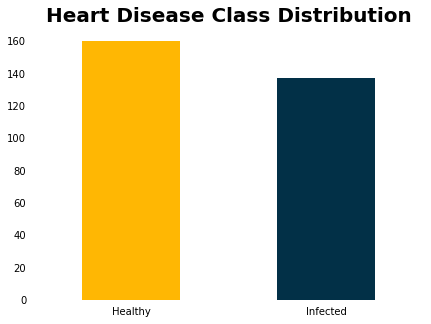

In [8]:
# finding how many of classes are there
# Approaching specific column
# Alternative hd['target'].value_counts()

fig = plt.figure(figsize=(7,5))
ax = hd.target.value_counts().plot(kind='bar', color={'#023047', '#ffb703'});
plt.title('Heart Disease Class Distribution', fontsize=20, weight='bold');
ax.set_xticklabels(['Healthy', 'Infected'], rotation=0);
# for removing x & y small ticks next to label on axes
ax.tick_params(bottom = 0, left = 0);
# for removing borders of axes
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)

## Finding Patterns
### a. Heart Disease Frequency according to Sex

In [9]:
hd.sex.value_counts()

1    201
0     96
Name: sex, dtype: int64

In [10]:
# Comparing Target & Sex column
comp_tar_sex = pd.crosstab(hd.sex,hd.target)
comp_tar_sex

target,0,1
sex,,
0,71,25
1,89,112


<Figure size 504x360 with 0 Axes>

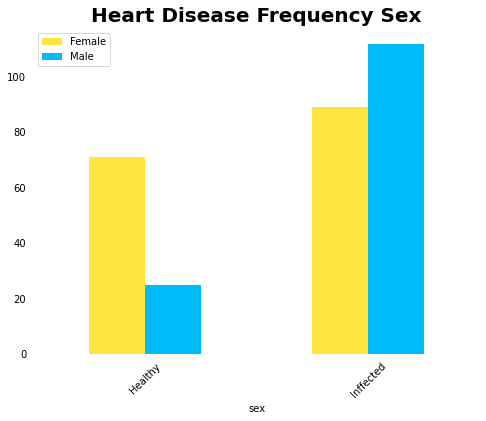

In [11]:
fig = plt.figure(figsize=(7,5))
ax1 = comp_tar_sex.plot(kind='bar', figsize=(8,6), color=['#fee440','#00bbf9']);
plt.title('Heart Disease Frequency Sex', fontsize=20, weight='bold');
plt.legend(['Female','Male']);
ax1.set_xticklabels(['Healthy', 'Inffected'], rotation=45);
# for removing x & y small ticks next to label on axes
ax1.tick_params(bottom = 0, left = 0);
# for removing borders of axes
for location in ['left', 'right', 'top', 'bottom']:
    ax1.spines[location].set_visible(False);

### b. Age vs Max Heart Rate for Heart Disease

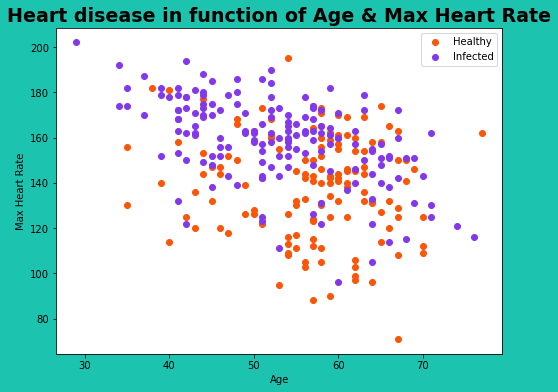

In [12]:
plt.figure(facecolor='#1CC4AF', figsize=(8,6))
# Taking subsets and comparing different columns
# Scatterplot with positive examples 
plt.scatter(hd.age[hd.target == 1], hd.thalach[hd.target == 1], 
            c='#fb5607');

# Scatterplot with negative examples
plt.scatter(hd.age[hd.target == 0], hd.thalach[hd.target == 0], 
            c='#8338ec');

plt.legend(['Healthy', 'Infected']);
plt.title('Heart disease in function of Age & Max Heart Rate', 
          fontsize=19, weight='bold');
plt.xlabel('Age');
plt.ylabel('Max Heart Rate');

### c. Heart Disease Frequency per Chest Pain Type
cp - chest pain type 
* 0: Typical Angina 
* 1: Atypical Angina 
* 2: Non-anginal Pain 
* 3: Asymptomatic

In [13]:
pd.crosstab(hd.cp, hd.target)

target,0,1
cp,,
0,16,7
1,40,9
2,65,18
3,39,103


<Figure size 720x432 with 0 Axes>

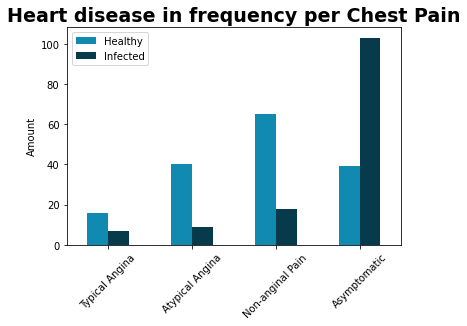

In [14]:
fig = plt.figure(figsize=(10,6))

ax = pd.crosstab(hd.cp, hd.target).plot(kind='bar', 
                                        color=['#118ab2', '#073b4c']);
ax.set_xticklabels(['Typical Angina', 'Atypical Angina', 
                    'Non-anginal Pain', 'Asymptomatic'], 
                   rotation=45);

plt.legend(['Healthy', 'Infected']);
plt.title('Heart disease in frequency per Chest Pain', 
          fontsize=19, weight='bold');
plt.ylabel('Amount');
plt.xlabel('');

### d. Finding Correlation of Independent Variables

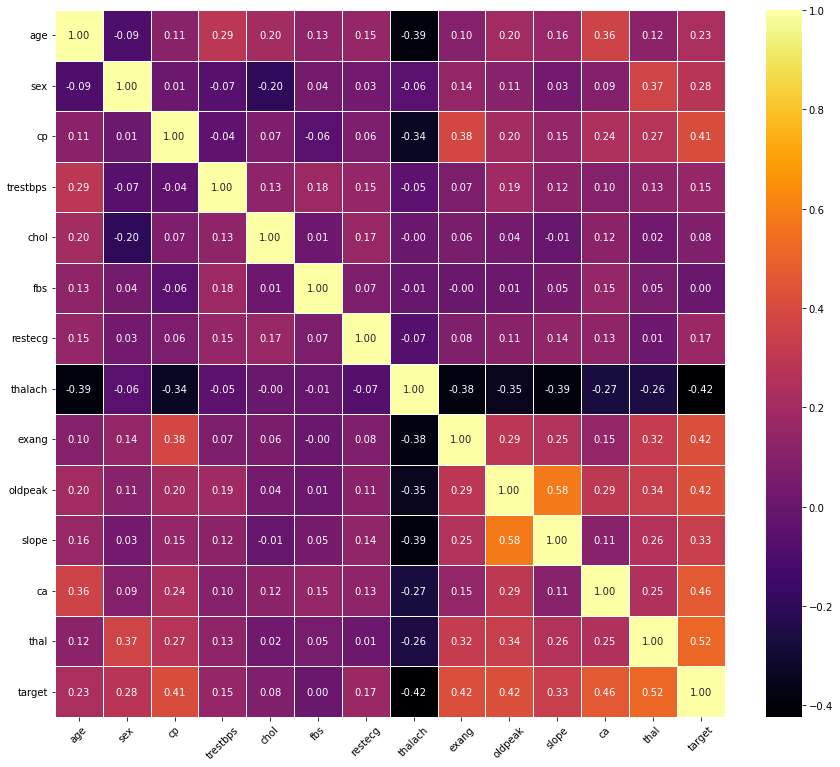

In [15]:
#colors = sns.color_palette("mako", as_cmap=True)
corr_matrix = hd.corr()

fig, ax = plt.subplots(figsize=(15,13))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt='.2f', cmap= 'inferno');
#ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt='.2f', cmap= colors);

plt.xticks(rotation=45);
plt.yticks(rotation=0);

## Modelling

In [16]:
hd.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0


In [17]:
# Splitting dataset into X & y
X = hd.drop('target', axis=1)
y = hd.target

# for same results
np.random.seed(42)

# Splitting our data into training & test sets
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2)

### Choosing the Right Estimator
For experimentation reasons I will try 3 different machine learning models.
1. Logistic Regression
2. K Neighbors Classifier
3. Random Forest Classifier

In [18]:
# Putting models in dictionary for convenience
models = {'Logistic Regression': LogisticRegression(), 
          'KNN': KNeighborsClassifier(), 
          'Random Forest Classifier': RandomForestClassifier()}

# Function for fit & score models
def fit_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits & Evaluates given ML Models.
    models: a dictionary of different ML models.
    X_train: Training Dataset (No Labels)
    X_test: Testing Dataset (No Labels)
    y_train: Training Labels
    y_test: Test Labels
    '''
    np.random.seed(42)
    # Make an empty dictionary to keep model scores
    model_scores = {}
    # Loop throght models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model & append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores    

In [19]:
model_scores = fit_score(models = models, 
                         X_train = X_train,
                         X_test = X_test,
                         y_train = y_train, 
                         y_test = y_test)

model_scores

{'Logistic Regression': 0.7333333333333333,
 'KNN': 0.5666666666666667,
 'Random Forest Classifier': 0.7}

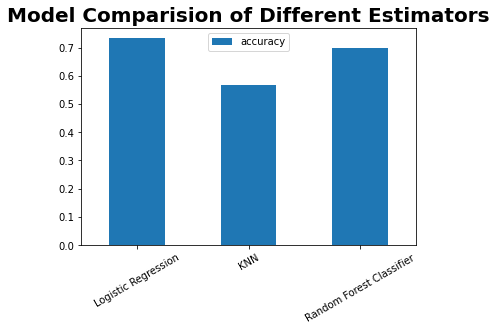

In [20]:
model_comp = pd.DataFrame(model_scores, index=['accuracy'])
# T for tranposing it because otherwise all bars are jumbled up into each other
model_comp.T.plot.bar();

plt.xticks(rotation=30);
plt.title('Model Comparision of Different Estimators', 
          fontsize=20, weight='bold');

 ## Hyperparameter Tuning
 ### a. Manual Tuning

In [21]:
# Tuning knn
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Setting up knn instance
knn = KNeighborsClassifier()

# loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [22]:
train_scores

[1.0,
 0.7974683544303798,
 0.8016877637130801,
 0.7890295358649789,
 0.7763713080168776,
 0.7679324894514767,
 0.7679324894514767,
 0.7637130801687764,
 0.7383966244725738,
 0.7257383966244726,
 0.7257383966244726,
 0.7257383966244726,
 0.7257383966244726,
 0.729957805907173,
 0.7383966244725738,
 0.7215189873417721,
 0.7383966244725738,
 0.7426160337552743,
 0.7552742616033755,
 0.7510548523206751]

In [23]:
test_scores

[0.5166666666666667,
 0.5333333333333333,
 0.48333333333333334,
 0.5333333333333333,
 0.5666666666666667,
 0.55,
 0.55,
 0.5166666666666667,
 0.5833333333333334,
 0.5666666666666667,
 0.6166666666666667,
 0.6,
 0.5833333333333334,
 0.5833333333333334,
 0.6166666666666667,
 0.6166666666666667,
 0.6166666666666667,
 0.6,
 0.6,
 0.6]

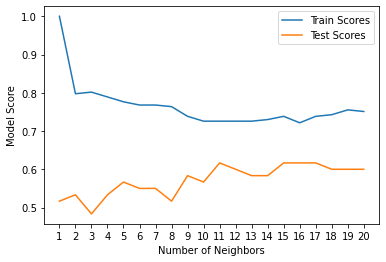

Maximum KNN score on the test data: 61.67%


In [24]:
plt.plot(neighbors, train_scores, label= 'Train Scores')
plt.plot(neighbors, test_scores, label= 'Test Scores')
# Shows a range from 1 to 21 with a step of 1
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of Neighbors')
plt.ylabel('Model Score')
plt.legend()
plt.show()

print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

### b. Tuning with RandomizedSearchCV
Tuning hyperparameters using `RandomizedSearchCV` for :
1. Logistic Regression
2. Random Forest Classifier

In [25]:
# Create a hyperparameter grid for Logistic Regression
log_grid = {'C': np.logspace(-4,4,20), 
            'solver': ['liblinear']}

# Create a hyperparameter grid for Random Forest Classifier
rfc_grid = {'n_estimators': np.arange(10,1000,50), 
            'max_depth': [None, 3,5,10], 
            'min_samples_split': np.arange(2,20,2), 
            'min_samples_leaf': np.arange(1,20,2)}

In [26]:
np.random.seed(42)

# Setup random hyperparameter search for Logistic Regression
rs_log = RandomizedSearchCV(LogisticRegression(), 
                            param_distributions = log_grid, 
                            cv = 5, 
                            n_iter = 20, 
                            verbose = True)

# Fit random hyperparameter search model for logistic Regression
rs_log.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [27]:
rs_log.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [28]:
rs_log.score(X_test, y_test)

0.7333333333333333

> Same results as compared to the above for logistic regression.

Checking out results for `Random Forest Classifier` if the model is improved with hyperparameter tuning or not.

In [29]:
np.random.seed(42)

# Setup random hyperparameter search for Random Forest Classifier
rs_rfc = RandomizedSearchCV(RandomForestClassifier(), 
                            param_distributions = rfc_grid, 
                            cv = 5, 
                            n_iter = 20, 
                            verbose = True)

# Fit random hyperparameter search model for Random Forest Classifier
rs_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [30]:
rs_rfc.best_params_

{'n_estimators': 610,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 5}

In [31]:
rs_rfc.score(X_test, y_test)

0.7333333333333333

### c. Tuning with GridSearchCV

In [32]:
np.random.seed(42)

# Setup grid hyperparameter search for Logistic Regression
gs_log = GridSearchCV(LogisticRegression(), 
                      param_grid = log_grid, 
                      cv = 5, 
                      verbose = True)

# Fit grid hyperparameter search model for logistic Regression
gs_log.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [33]:
gs_log.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [34]:
gs_log.score(X_test, y_test)

0.7333333333333333

In [35]:
# np.random.seed(42)

# Setup grid hyperparameter search for Random Forest Classifier
# gs_rfc = GridSearchCV(RandomForestClassifier(), 
#                       param_grid = rfc_grid, 
#                       cv = 5, 
#                       verbose = True)

# Fit grid hyperparameter search model for Random Forest Classifier
# gs_rfc.fit(X_train, y_train)

In [36]:
# gs_rfc.best_params_

In [37]:
# gs_rfc.score(X_test, y_test)

## Evaluating Our Tuned Model
* ROC Curve & AUC Score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-Score
* Cross Validation Score where possible

In [38]:
# Make predictions with tuned model
y_preds = gs_log.predict(X_test)
y_preds

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [39]:
y_test

167    1
211    1
63     0
154    0
5      0
77     0
183    1
158    1
9      0
139    0
285    0
78     0
92     0
101    0
42     0
222    1
283    1
33     1
263    1
148    0
245    1
45     1
60     0
46     0
278    0
237    1
175    1
234    1
17     0
279    1
111    0
219    1
24     0
82     0
7      1
75     1
108    0
84     0
90     0
73     0
116    0
126    1
233    0
59     0
195    1
208    1
97     0
185    1
176    0
124    0
93     1
294    1
182    1
275    0
192    1
292    1
25     0
224    1
6      0
181    1
Name: target, dtype: int64

### a. ROC Curve & AUC Score

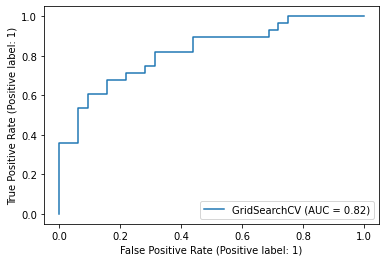

In [40]:
plot_roc_curve(gs_log, X_test, y_test);

### b. Confusion Matrix

In [42]:
confusion_matrix(y_test, y_preds)

array([[23,  9],
       [ 7, 21]], dtype=int64)

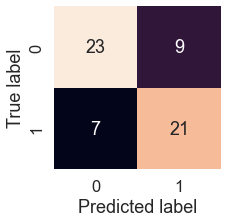

In [45]:
# Increase font size
sns.set(font_scale=1.5)
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    # predictions go on the x-axis
    plt.xlabel("Predicted label")
    # true labels go on the y-axis 
    plt.ylabel("True label") 
    
plot_conf_mat(y_test, y_preds)

### c. Classification Report

In [47]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



### d. Cross Validation Score

In [49]:
gs_log.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [50]:
# Create a new clf  with best parameters
clf = LogisticRegression(C = 0.08858667904100823, solver = 'liblinear')

In [53]:
# Cross Validated Accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring= 'accuracy')
print(cv_acc)
np.mean(cv_acc)

[0.7        0.88333333 0.83050847 0.94915254 0.84745763]


0.8420903954802259

In [54]:
# Cross Validated Precision
cv_pre = cross_val_score(clf, X, y, cv=5, scoring= 'precision')
print(cv_pre)
np.mean(cv_pre)

[1.         0.92       0.79310345 0.9        0.84615385]


0.8918514588859416

In [55]:
# Cross Validated Recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring= 'recall')
print(cv_recall)
np.mean(cv_recall)

[0.35714286 0.82142857 0.85185185 1.         0.81481481]


0.7690476190476191

In [57]:
# Cross Validated f1-Score
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring= 'f1')
print(cv_f1)
np.mean(cv_f1)

[0.52631579 0.86792453 0.82142857 0.94736842 0.83018868]


0.7986451979004114

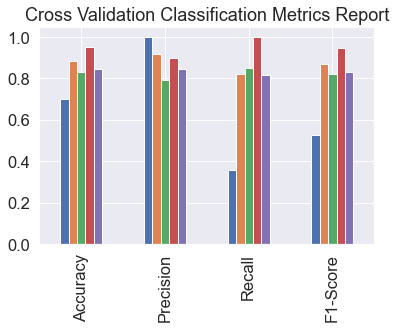

In [60]:
# Visualize cross validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc, 
                           'Precision': cv_pre, 
                           'Recall': cv_recall, 
                           'F1-Score': cv_f1})

cv_metrics.T.plot.bar(title = 'Cross Validation Classification Metrics Report', 
                      legend = False);

## Feature Importance
> What are the features which contributed the most to the outcomes of the model & how did the contribute?

There are different ways of finding feature importance one of which is by searching through `(Model_Name) feature importance`. 

Finding Feature Importance for Logistics Regression Model 

In [61]:
gs_log.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [63]:
clf = LogisticRegression(C = 0.08858667904100823, solver = 'liblinear')
clf.fit(X_train, y_train)

# Check Coef
clf.coef_

array([[-0.01575557,  0.56288132,  0.2787732 ,  0.01871588,  0.00378119,
        -0.12665073,  0.22588847, -0.03607805,  0.27712477,  0.39885816,
         0.12417274,  0.69851039,  0.67393433]])

In [66]:
# Match Coef's of features to columns of our heart disease dataset
feature_dict = dict(zip(hd.columns, list(clf.coef_[0])))
feature_dict

{'age': -0.01575557240725165,
 'sex': 0.5628813236313458,
 'cp': 0.27877319658245475,
 'trestbps': 0.018715880569493117,
 'chol': 0.0037811925177674613,
 'fbs': -0.12665072690343113,
 'restecg': 0.22588847244063545,
 'thalach': -0.03607804812558726,
 'exang': 0.27712476922530754,
 'oldpeak': 0.3988581610355597,
 'slope': 0.12417274340552807,
 'ca': 0.6985103924930828,
 'thal': 0.6739343323479832}

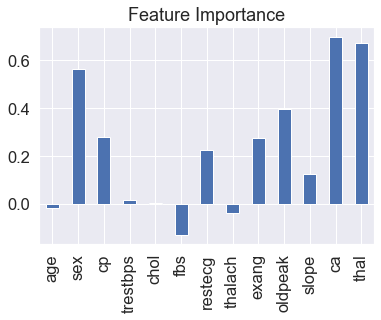

In [71]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title = 'Feature Importance', 
                      legend = False);